<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [ ]:
import pandas as pd
iris = pd.read_csv("https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv")
print(iris[:5])
iris.head()

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 타겟 값 확인하기

In [ ]:
import numpy as np
print(np.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.isnull().any())
print(iris.info())

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### 타겟 개수 그래프로 그려보기

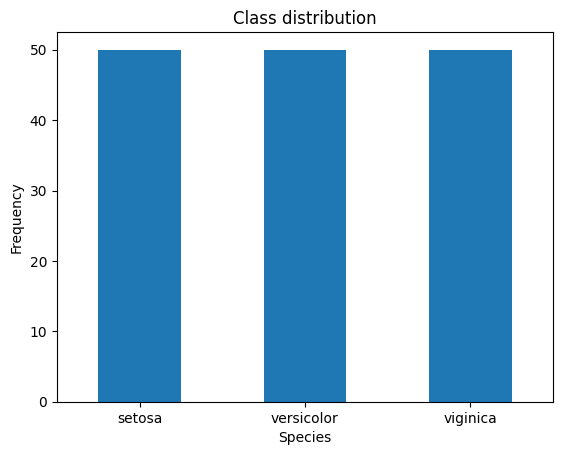

In [ ]:
labels = ["setosa", "versicolor", "viginica"]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(iris['Species'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Class distribution')
plt.xticks(range(3), labels)
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.show()

In [ ]:
count_classes = pd.value_counts(iris['Species'], sort=True)
print(count_classes)

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [ ]:
iris_input = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

## 훈련 데이터와 테스트 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target,
                                                   test_size=0.2, stratify=iris_target, random_state=42)
print(train_input.shape, test_input.shape)

(120, 4) (30, 4)


## 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모델 만들기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.975
0.9333333333333333


In [ ]:
score_train = []
score_test = []

for i in range(1, 20):
    kne = KNeighborsClassifier(n_neighbors = i)
    kne.fit(train_scaled, train_target)
    score_train.append(kne.score(train_scaled, train_target))
    score_test.append(kne.score(test_scaled, test_target))

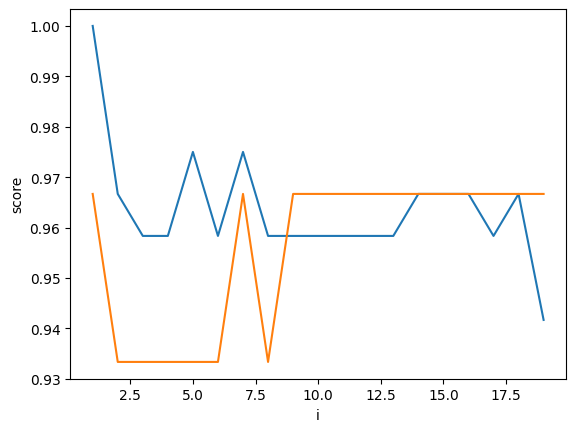

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 20, 1)
plt.plot(x, score_train)
plt.plot(x, score_test)
plt.xlabel('i')
plt.ylabel('score')
plt.show()

In [ ]:
kne = KNeighborsClassifier(n_neighbors = 7)
kne.fit(train_scaled, train_target)
print(kne.score(train_scaled, train_target))
print(kne.score(test_scaled, test_target))

0.975
0.9666666666666667


In [ ]:
kne = KNeighborsClassifier(n_neighbors=14)
kne.fit(train_scaled, train_target)
print(kne.score(train_scaled, train_target))
print(kne.score(test_scaled, test_target))

0.9666666666666667
0.9666666666666667


In [ ]:
kne = KNeighborsClassifier(n_neighbors=7)
kne.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(kn.predict(test_scaled[:5]))
print(kn.predict_proba(test_scaled[:5]))

['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa']
[[1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]]


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']
